In [1]:
pip install simanneal 

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining




11364 mile route:
New York City, Memphis, Chicago, Indianapolis, Columbus, Houston, Dallas, Fort Worth, Jacksonville, Charlotte, Philadelphia, Baltimore, Detroit, Austin, San Antonio, Phoenix, San Jose, San Diego, Los Angeles, San Francisco


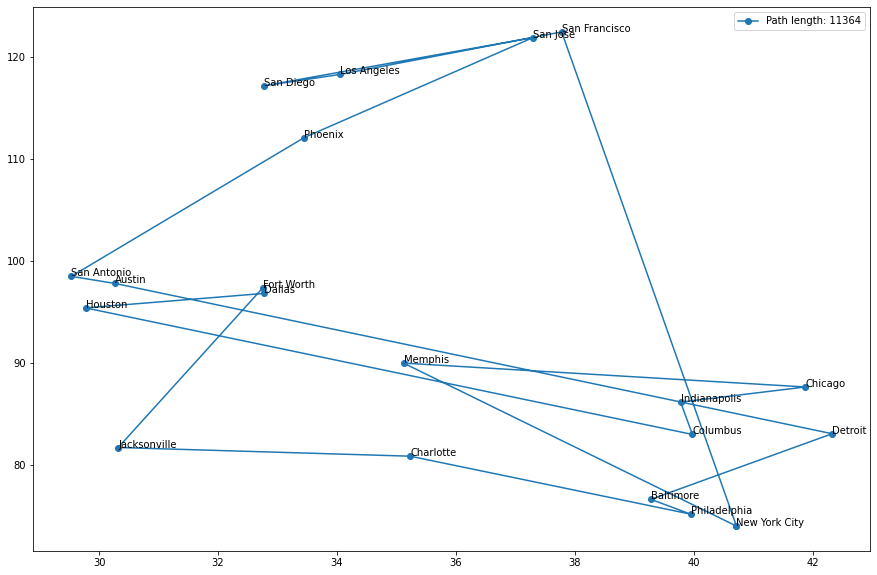

In [37]:
from __future__ import print_function
import math
import random
from collections import defaultdict
from simanneal import Annealer
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx


def distance(a, b):
    """Calculates distance between two latitude-longitude coordinates."""
    R = 3963  # radius of Earth (miles)
    lat1, lon1 = math.radians(a[0]), math.radians(a[1])
    lat2, lon2 = math.radians(b[0]), math.radians(b[1])
    return math.acos(math.sin(lat1) * math.sin(lat2) +
                     math.cos(lat1) * math.cos(lat2) * math.cos(lon1 - lon2)) * R


class TravellingSalesmanProblem(Annealer):

    """Test annealer with a travelling salesman problem.
    """

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  # important!

    def move(self):
        """Swaps two cities in the route."""
        # no efficiency gain, just proof of concept
        # demonstrates returning the delta energy (optional)
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e


if __name__ == '__main__':

    # latitude and longitude for the twenty largest U.S. cities
    cities = {
        'New York City': (40.72, 74.00),
        'Los Angeles': (34.05, 118.25),
        'Chicago': (41.88, 87.63),
        'Houston': (29.77, 95.38),
        'Phoenix': (33.45, 112.07),
        'Philadelphia': (39.95, 75.17),
        'San Antonio': (29.53, 98.47),
        'Dallas': (32.78, 96.80),
        'San Diego': (32.78, 117.15),
        'San Jose': (37.30, 121.87),
        'Detroit': (42.33, 83.05),
        'San Francisco': (37.78, 122.42),
        'Jacksonville': (30.32, 81.70),
        'Indianapolis': (39.78, 86.15),
        'Austin': (30.27, 97.77),
        'Columbus': (39.98, 82.98),
        'Fort Worth': (32.75, 97.33),
        'Charlotte': (35.23, 80.85),
        'Memphis': (35.12, 89.97),
        'Baltimore': (39.28, 76.62)
    }

    # initial state, a randomly-ordered itinerary
    init_state = list(cities)
    random.shuffle(init_state)

    # create a distance matrix
    distance_matrix = defaultdict(dict)
    for ka, va in cities.items():
        for kb, vb in cities.items():
            distance_matrix[ka][kb] = 0.0 if kb == ka else distance(va, vb)

    tsp = TravellingSalesmanProblem(init_state, distance_matrix)
    tsp.set_schedule(tsp.auto(minutes=0.2, steps=1))
    # since our state is just a list, slice is the fastest way to copy
    tsp.copy_strategy = "slice"
    state, e = tsp.anneal()


    while state[0] != 'New York City':
        state = state[1:] + state[:1]  # rotate NYC to start

    print("\n")
    print("%i mile route:" % e)
    print(", ".join(state))

    latitude = [cities[city][0] for city in state] + [cities[state[0]][0]]
    longitude = [cities[city][1] for city in state] + [cities[state[0]][1]]

    plt.rcParams['figure.figsize'] = (15,10)
    fig, ax = plt.subplots()
    ax.plot(latitude, longitude, "-o", label=f"Path length: {int(e)}")

    for i, txt in enumerate(state):
      ax.annotate(txt, (latitude[i], longitude[i]))

    plt.legend()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining




6801 mile route:
New York City, Philadelphia, Baltimore, Charlotte, Jacksonville, Memphis, Dallas, Fort Worth, Houston, Austin, San Antonio, Phoenix, San Diego, Los Angeles, San Jose, San Francisco, Chicago, Indianapolis, Columbus, Detroit


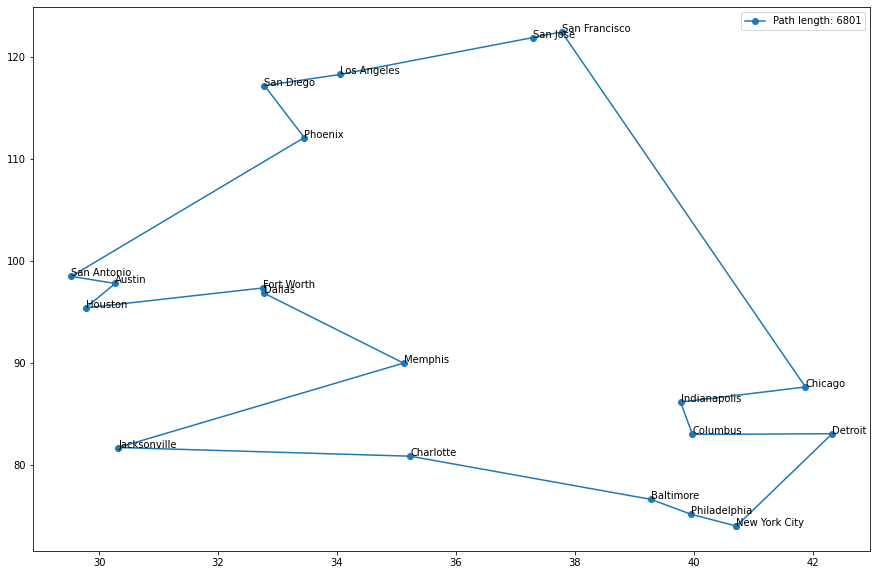

In [38]:
    tsp.set_schedule(tsp.auto(minutes=0.2))
    # since our state is just a list, slice is the fastest way to copy
    tsp.copy_strategy = "slice"
    state, e = tsp.anneal()

    while state[0] != 'New York City':
        state = state[1:] + state[:1]  # rotate NYC to start

    print("\n")
    print("%i mile route:" % e)
    print(", ".join(state))

    latitude = [cities[city][0] for city in state] + [cities[state[0]][0]]
    longitude = [cities[city][1] for city in state] + [cities[state[0]][1]]

    plt.rcParams['figure.figsize'] = (15,10)
    fig, ax = plt.subplots()
    ax.plot(latitude, longitude, "-o", label=f"Path length: {int(e)}")

    for i, txt in enumerate(state):
      ax.annotate(txt, (latitude[i], longitude[i]))

    plt.legend()